In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [105]:
col_names = ['ID', 'label', 'statement', 'subject', 'speaker', 'speaker\'s title', 'state', 'party', 'barely true', 'false', 'half true', 'mostly true', 'pants on fire', 'context', 'justification']
raw_train = pd.read_csv('dataset/tsv/train2.tsv', sep='\t', header=0, names=col_names)
# df_test = pd.read_csv('test.tsv', sep='\t')
# df_val = pd.read_csv('valid.tsv', sep='\t')

In [106]:
raw_train.head()

,ID,label,statement,subject,speaker,speaker's title,state,party,barely true,false,half true,mostly true,pants on fire,context,justification
1.0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
2.0,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
3.0,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
4.0,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."
5.0,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,"But Vos specifically used the word ""fired,"" wh..."


In [93]:
for statement in raw_train['statement'][:15]:
    print(statement, '\n')

When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration. 

Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran." 

Health care reform legislation is likely to mandate free sex change surgeries. 

The economic turnaround started at the end of my term. 

The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades. 

Jim Dunnam has not lived in the district he represents for years now. 

I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate. 

However, it took $19.5 million in Oregon Lottery funds for the Port of Newport to eventually land the new NOAA Marine Operations Center-Pacific. 

Says GOP primary opponents Glenn Grothman and Joe Leibham cast a compro

In [94]:
for justification in raw_train['justification'][:15]:
    print(justification, '\n')

Surovell said the decline of coal "started when natural gas took off  That started to begin in President (George W. ) Bushs administration. "No doubt, natural gas has been gaining ground on coal in generating electricity. The trend started in the 1990s but clearly gained speed during the Bush administration when the production of natural gas -- a competitor of coal -- picked up. But analysts give little credit or blame to Bush for that trend. They note that other factors, such as technological innovation, entrepreneurship and policies of previous administrations, had more to do with laying the groundwork for the natural gas boom. 

Obama said he would have voted against the amendment if he had been present. So though Clinton may have "agreed" with McCain on the issue, they did not technically vote the same way on it. To say that voting for Kyl-Lieberman is "giving George Bush the benefit of the doubt on Iran" remains a contentious issue. But Obama's main point is that Clinton and McCai

In [142]:
raw_train['label'].value_counts()

half-true      2114
false          1994
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: label, dtype: int64

In [26]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10241 entries, 1.0 to 10268.0
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10239 non-null  object 
 1   label            10239 non-null  object 
 2   statement        10239 non-null  object 
 3   subject          10237 non-null  object 
 4   speaker          10237 non-null  object 
 5   speaker's title  7342 non-null   object 
 6   state            8031 non-null   object 
 7   party            10237 non-null  object 
 8   barely true      10237 non-null  float64
 9   false            10237 non-null  float64
 10  half true        10237 non-null  float64
 11  mostly true      10237 non-null  float64
 12  pants on fire    10237 non-null  float64
 13  context          10137 non-null  object 
 14  justification    10153 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.3+ MB


In [27]:
raw_train.duplicated().sum()

1

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

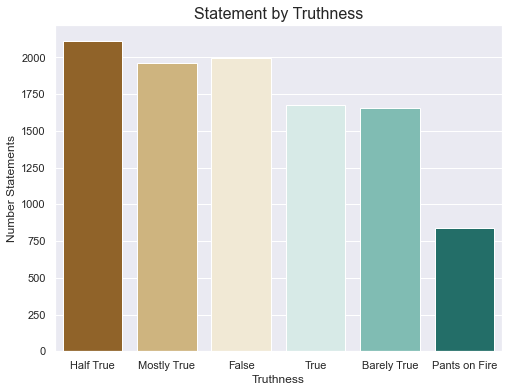

In [38]:
# Visualize the count of classes of target variable
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='label', data=raw_train, palette='BrBG')
ax.set_title('Statement by Truthness', fontsize=16)
ax.set_xlabel('Truthness', fontsize=12)
ax.set_xticklabels(['Half True', 'Mostly True', 'False', 'True', 'Barely True', 'Pants on Fire'])
ax.set_ylabel('Number Statements', fontsize=12)
plt.show()

In [36]:
raw_train.isna().sum()

ID                    1
label                 1
statement             1
subject               3
speaker               3
speaker's title    2898
state              2209
party                 3
barely true           3
false                 3
half true             3
mostly true           3
pants on fire         3
context             103
justification        87
dtype: int64

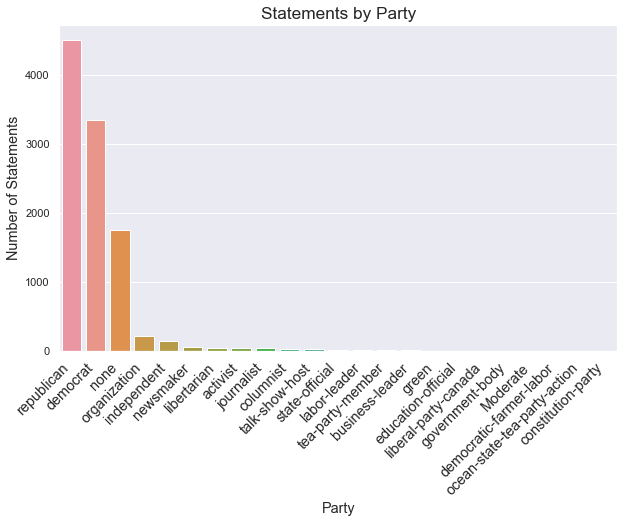

In [39]:
#visualize the counts of statements by party

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.countplot(
    data=raw_train, 
    x="party", order=raw_train["party"].value_counts().index)

ax.set_title('Statements by Party', fontsize='x-large')
ax.set_xlabel('Party',fontsize='large')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='large')
ax.set_ylabel('Number of Statements',fontsize='large');

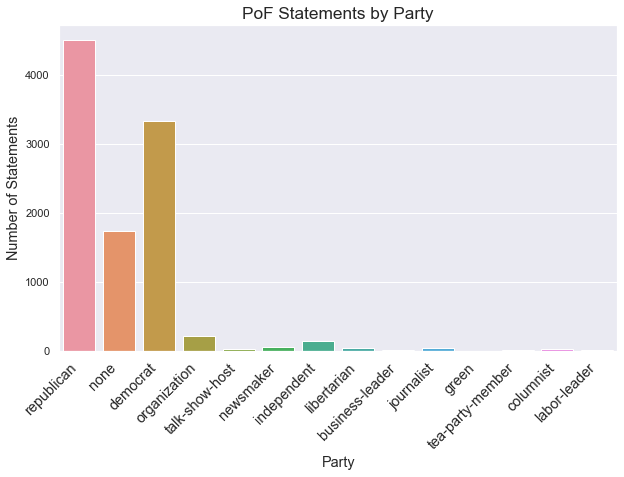

In [95]:
#visualize the counts of statements by party

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.countplot(
    data=raw_train, 
    x="party", order=raw_train['party'][raw_train['label']=='pants-fire'].value_counts().index)

ax.set_title('PoF Statements by Party', fontsize='x-large')
ax.set_xlabel('Party',fontsize='large')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='large')
ax.set_ylabel('Number of Statements',fontsize='large');

## Cleaning

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [108]:
from nltk.corpus import stopwords
import re
from nltk.stem.wordnet import WordNetLemmatizer

In [143]:
def drop_na(df):
    df = df.dropna(subset=['statement'], axis=0)
    return df

In [144]:
def drop_duplicated(df):
    df = df.drop_duplicates()
    return df

In [156]:
def label(df):
    df['label'] = df['label'].map({'true': 0,
                                     'mostly-true': 0,
                                     'half-true': 1,
                                     'false': 1,
                                     'barely-true': 1,
                                     'pants-fire': 1})
    return df

In [147]:
def clean(text):
    text=text.lower()
    stp=set(stopwords.words("english"))
    placesp = re.compile('[/(){}\[\]\|@,;]')
    removech= re.compile('[^0-9a-z #+_]')
    st=WordNetLemmatizer()
    text=re.sub(placesp,' ',text)
    text=re.sub(removech,' ',text)
    text=text.split()
    text=[w for w in text if not w in stp]
    text=[st.lemmatize(w) for w in text]
    text=" ".join(text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

In [148]:
def clean_df(df):
    df['statement'] = df['statement'].apply(lambda x: clean(x))
    return df

In [161]:
def drop_features(df):
    df = df[['statement','label']]
    return df

In [162]:
cleaning_pipeline = Pipeline(steps=[
    ('drop_na', FunctionTransformer(drop_na)),
    ('drop_duplicated', FunctionTransformer(drop_duplicated)),
    ('label', FunctionTransformer(label)),
    ('clean', FunctionTransformer(clean_df)),
    ('drop_features', FunctionTransformer(drop_features)),
])

In [163]:
df_train_clean = cleaning_pipeline.fit_transform(raw_train)

In [165]:
X_train_clean = df_train_clean['statement']
y_train_clean = df_train_clean['label']

In [164]:
df_train_clean.head()

,statement,label
1.0,decline coal start started natural gas took st...,1
2.0,hillary clinton agrees john mccain voting give...,0
3.0,health care reform legislation likely mandate ...,1
4.0,economic turnaround started end term,1
5.0,chicago bear starting quarterback last 10 year...,0


In [160]:
df_train_clean['label'].value_counts()

1    6601
0    3638
Name: label, dtype: int64

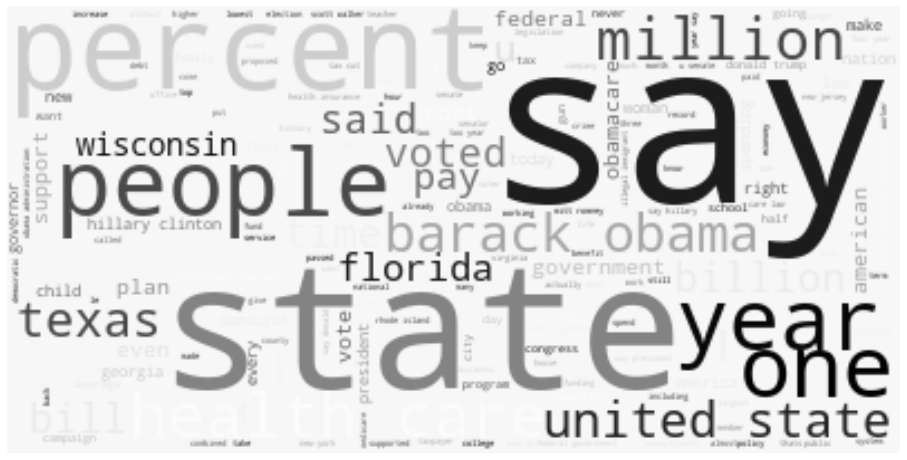

In [155]:
text = ' '.join(df_train_clean['statement'])

# Create and generate a word cloud image:
plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color='#f7f7f7', colormap='Greys_r', random_state=1).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

In [168]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [179]:
mnb = Pipeline([('cv', CountVectorizer()),
               ('mnb', MultinomialNB())])

lr = Pipeline([('Vectorizer', CountVectorizer()),
               ('LogisticReg', LogisticRegression())])

dtc = Pipeline([('Vectorizer', CountVectorizer()),
               ('DecisionTree', DecisionTreeClassifier())])

rf = Pipeline([('Vectorizer', CountVectorizer()),
               ('RandomFor', RandomForestClassifier())]) 

etc = Pipeline([('Vectorizer', CountVectorizer()),
               ('ExtraTrees', ExtraTreesClassifier())]) 

gbc = Pipeline([('Vectorizer', CountVectorizer()),
               ('gradiendboosting', GradientBoostingClassifier())])

svc = Pipeline([('Vectorizer', CountVectorizer()),
                ('SupportVec', SVC())])

sgd = Pipeline([('Vectorizer', CountVectorizer()),
                ('StochGrad', SGDClassifier())])

pac = Pipeline([('Vectorizer', CountVectorizer()),
                ('PassAgress', PassiveAggressiveClassifier())])

mlp = Pipeline([('Vectorizer', CountVectorizer()),
                ('MultiLayerPerc', MLPClassifier())])

In [178]:
models1 = [('MultiNomBa', mnb),
          ('LogisticReg', lr),
          ('DecTreeClass', dtc),
          ('RandomFor', rf),
          ('ExtraTrees', etc),
          ('GradBoost', gbc),
          ('SupportVec', svc),
          ('StochGrad', sgd),
          ('PassAgress', pac),
          ('MultiLayerPerc', mlp)]

In [171]:
def fit_models(models, X, y):
    '''
    Inputs a list of (name, model), X, y
    Fits data into models
    '''
    for name, model in models:
        model.fit(X, y)
    return None

In [173]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [188]:
def print_cm_with_labels(y_true, 
                         y_pred):
    '''
    Takes the true values and predicted values of a classifier and 
    plots a confusion matrix (normalized by predictions) using 
    a list of given display labels.
    '''
    disp_labels = ['True', 'Fake']
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=disp_labels)

    fig, ax = plt.subplots(figsize=(6,6))
    disp.plot(ax=ax)
    ax.grid(False)
    disp.ax_.set_xticklabels(disp_labels);

In [175]:
from sklearn.model_selection import cross_validate

In [186]:
def cross_validate_models(models, X, y, cv=5, scoring='accuracy', cm=False):
    '''
    Input: Models (name, model), X, y
    Output: models scores (default='accuracy')
    if cm=True, print models confusion matrices
    '''
    fit_models(models, X_train_clean, y_train_clean)
    results = [(name, cross_validate(model, X_train_clean, y_train_clean, scoring=scoring, cv=cv)) for name, model, in models]
    scores = [(result[0], result[1]['test_score'].mean()) for result in results]
    if cm==True:
        for model in models:
             print_cm_with_labels(y_train_clean, model[1].predict(X_train_clean))
    return scores

NameError: name 'display_labels' is not defined

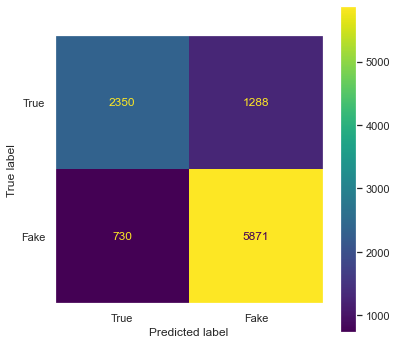

In [187]:
scores1 = cross_validate_models(models1, X_train_clean, y_train_clean, cv=2, cm=True)

In [69]:
a = raw_train['statement'][:10]

In [65]:
a

'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.'

In [71]:
for statement in a:
    b = clean(statement)
    print(b)

decline coal start started natural gas took started begin president george w bush administration
hillary clinton agrees john mccain voting give george bush benefit doubt iran
health care reform legislation likely mandate free sex change surgery
economic turnaround started end term
chicago bear starting quarterback last 10 year total number tenured uw faculty fired last two decade
jim dunnam lived district represents year
person stage worked actively last year passing along rus feingold toughest ethic reform since watergate
however took 19 5 million oregon lottery fund port newport eventually land new noaa marine operation center pacific
say gop primary opponent glenn grothman joe leibham cast compromise vote cost 788 million higher electricity cost
first time history share national popular vote margin smaller latino vote margin


In [66]:
b

'decline coal start started natural gas took started begin president george w bush administration'

In [67]:
from nltk.stem.porter import PorterStemmer